# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/wy/dcbkyl6x6wd00gxgr07qrjyc0000gn/T/ipykernel_99855/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [9]:
import pandas as pd

# Load the CSV file
file_path = 'google_hourly_search_trends.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

# Checking for missing values in each column
df.isnull().sum()

# Drop rows with missing values (or alternatively, you could fill them if necessary)
df.dropna(inplace=True)

# Check if data cleaning was successful
df.isnull().sum()

# Assuming there’s a column named 'date' that we need to convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify the changes
df.info()




/var/folders/wy/dcbkyl6x6wd00gxgr07qrjyc0000gn/T/ipykernel_99855/4266614225.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37106 entries, 0 to 37105
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           37106 non-null  datetime64[ns]
 1   Search Trends  37106 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 579.9 KB


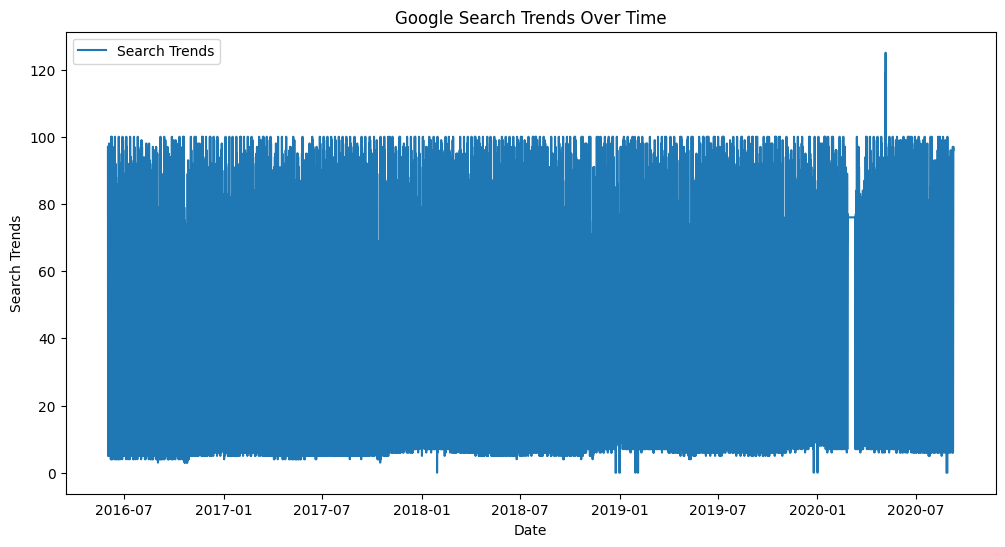

In [10]:
import matplotlib.pyplot as plt

# Plot search trends over time based on the available columns
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Search Trends'], label='Search Trends')
plt.title("Google Search Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.legend()
plt.show()


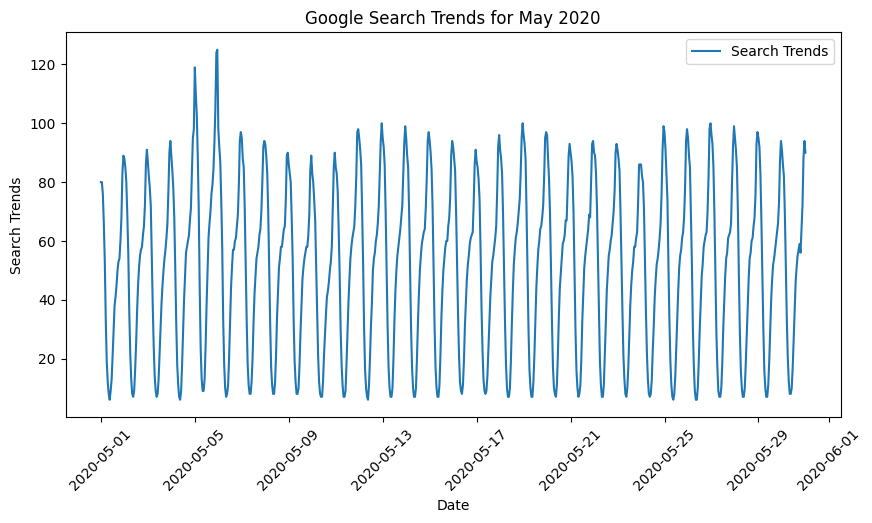

In [11]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df[(df['Date'] >= '2020-05-01') & (df['Date'] <= '2020-05-31')]


# Plot to visualize the data for May 2020
plt.figure(figsize=(10,5))
plt.plot(may_2020_data['Date'], may_2020_data['Search Trends'], label='Search Trends')
plt.title("Google Search Trends for May 2020")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [12]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data['Search Trends'].sum()


# View the traffic_may_2020 value
traffic_may_2020


37104

In [13]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
df.set_index('Date', inplace=True)
median_monthly_traffic = (
    df.resample('M')['Search Trends']  
    .sum()                             
    .median()                          
)

# View the median_monthly_traffic value
median_monthly_traffic


/var/folders/wy/dcbkyl6x6wd00gxgr07qrjyc0000gn/T/ipykernel_99855/2367486548.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Search Trends']


35172.5

In [14]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

1.0549150614826925

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, Google search traffic in May 2020 was slightly higher than usual, by about 5.5% compared to the typical monthly average.

This increase could be related to MercadoLibre’s financial results release in May, but it’s not a huge spike—just a moderate rise in search activity.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

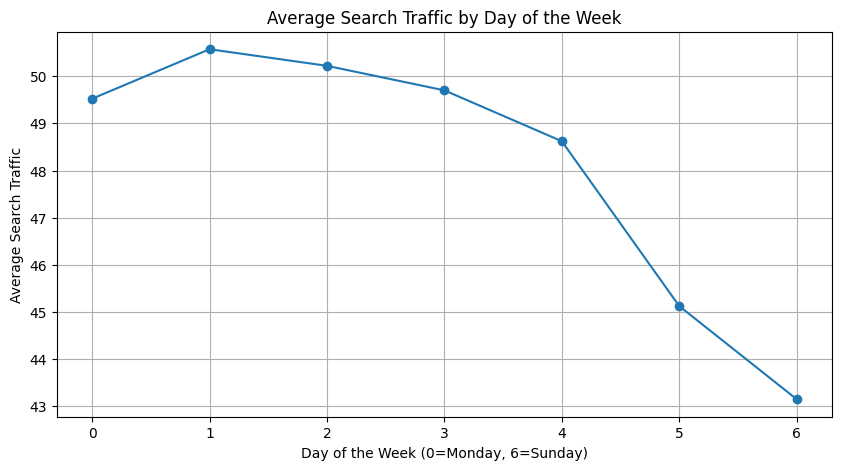

In [20]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
daily_avg_traffic = df.groupby('DayOfWeek')['Search Trends'].mean()

# Plot the average traffic by day of the week
plt.figure(figsize=(10,5))
plt.plot(daily_avg_traffic, marker='o')
plt.title("Average Search Traffic by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()


In [19]:
# Extract hour and day of the week directly from the index
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [23]:
import matplotlib.pyplot as plt


In [24]:
# Extract ISO day of the week (1 = Monday, 7 = Sunday)
df['ISO_DayOfWeek'] = df.index.isocalendar().day


In [26]:

# Now, group by 'ISO_DayOfWeek' and calculate the average traffic
iso_daily_avg_traffic = df.groupby('ISO_DayOfWeek')['Search Trends'].mean()

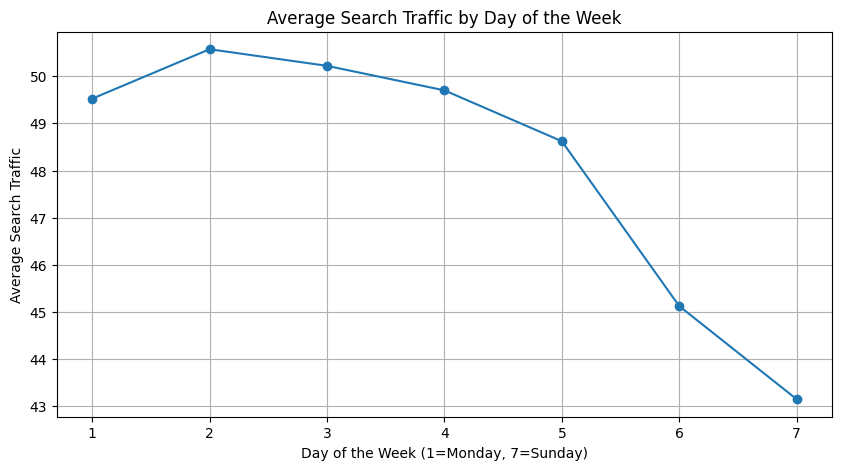

In [27]:
# Plot the average traffic by day of the week
# Plot the average traffic by day of the week
plt.figure(figsize=(10,5))
plt.plot(iso_daily_avg_traffic, marker='o')
plt.title("Average Search Traffic by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()

/var/folders/wy/dcbkyl6x6wd00gxgr07qrjyc0000gn/T/ipykernel_99855/855757592.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


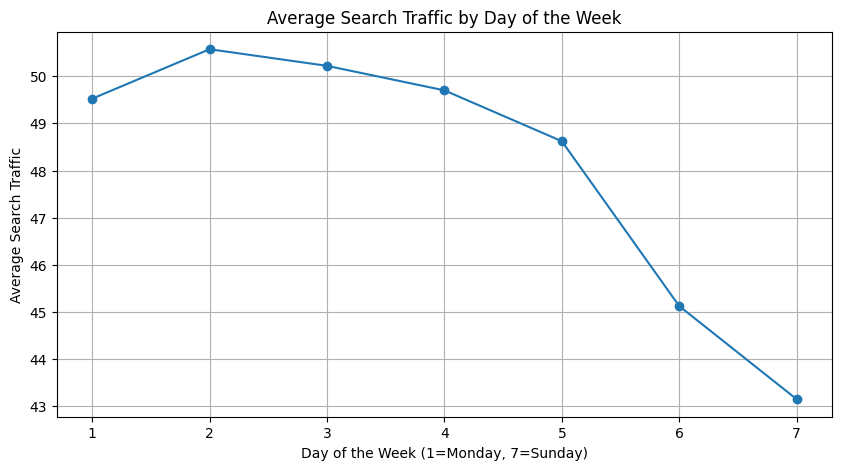

In [29]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is set as the DataFrame index and is in datetime format
df = pd.read_csv('/Users/aaliyahcarrington/Desktop/MODULE 8/google_hourly_search_trends.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract ISO day of the week (1 = Monday, 7 = Sunday)
df['ISO_DayOfWeek'] = df.index.isocalendar().day

# Group by 'ISO_DayOfWeek' and calculate the average traffic
iso_daily_avg_traffic = df.groupby('ISO_DayOfWeek')['Search Trends'].mean()

# Plot the average traffic by day of the week
plt.figure(figsize=(10,5))
plt.plot(iso_daily_avg_traffic, marker='o')
plt.title("Average Search Traffic by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

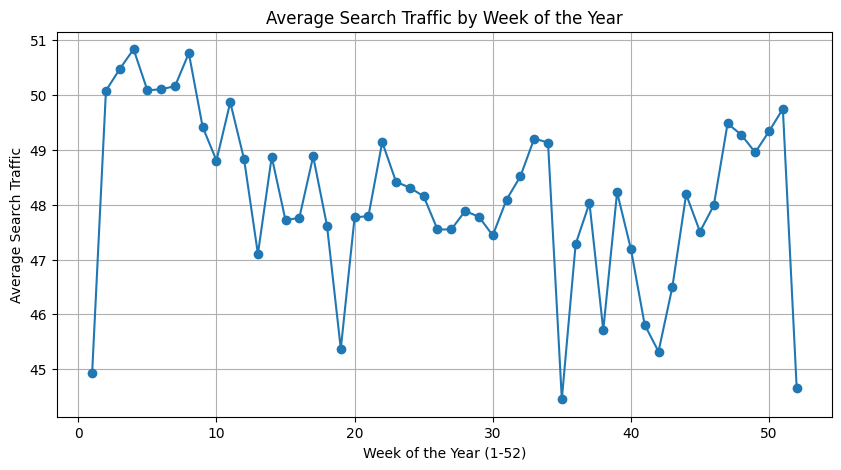

In [32]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
import matplotlib.pyplot as plt

# Ensure 'ISO_WeekOfYear' is correctly defined by extracting the ISO week of the year
df['ISO_WeekOfYear'] = df.index.isocalendar().week

# Group by 'ISO_WeekOfYear' and calculate the average traffic
weekly_avg_traffic = df.groupby('ISO_WeekOfYear')['Search Trends'].mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(10,5))
plt.plot(weekly_avg_traffic, marker='o')
plt.title("Average Search Traffic by Week of the Year")
plt.xlabel("Week of the Year (1-52)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()



##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Hourly Trends: If the hourly average traffic plot shows higher peaks at certain times (such as early morning or evening), it indicates that user interest tends to be time-sensitive, possibly aligning with user behavior patterns like work or leisure hours.

Day of the Week Trends: If the daily average traffic plot reveals higher traffic on particular days, such as weekends, this could indicate increased user activity on days when people have more free time. Alternatively, higher traffic during weekdays might indicate a focus on work-related searches.

Weekly Trends: If the average traffic plot for weeks of the year shows a rise during specific weeks, like those around the winter holiday period (weeks 40-52), it suggests seasonal interest. This could be due to increased e-commerce activity or holiday-related searches.



## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [33]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


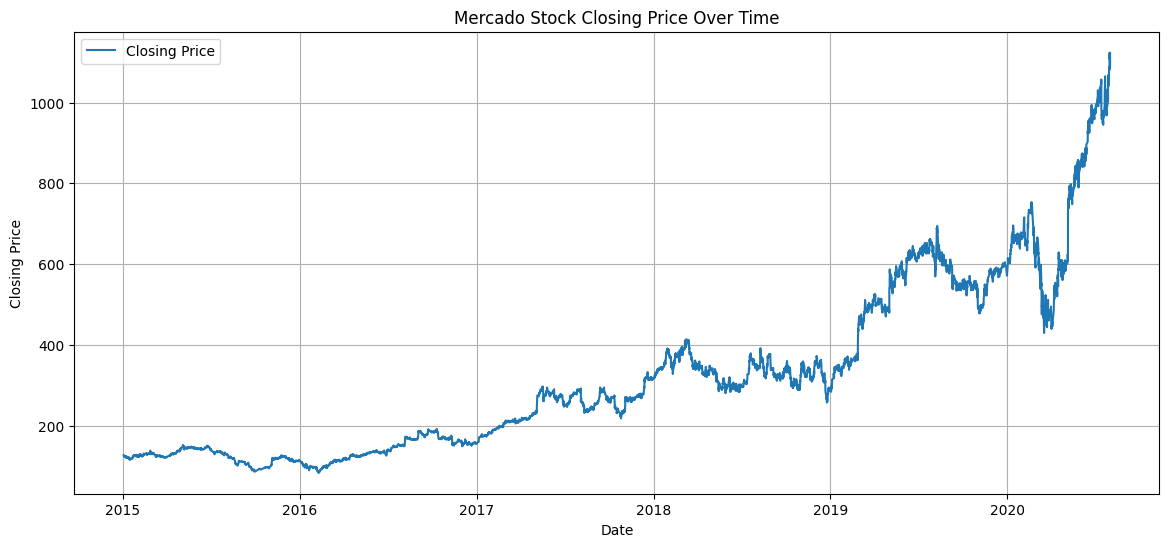

In [34]:
# Visualize the closing price of the df_mercado_stock DataFrame

# Plot the closing price
plt.figure(figsize=(14,6))
plt.plot(df_mercado_stock['close'], label='Closing Price')
plt.title("Mercado Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

In [35]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(how='any')


# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [36]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01':'2020-06']


# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


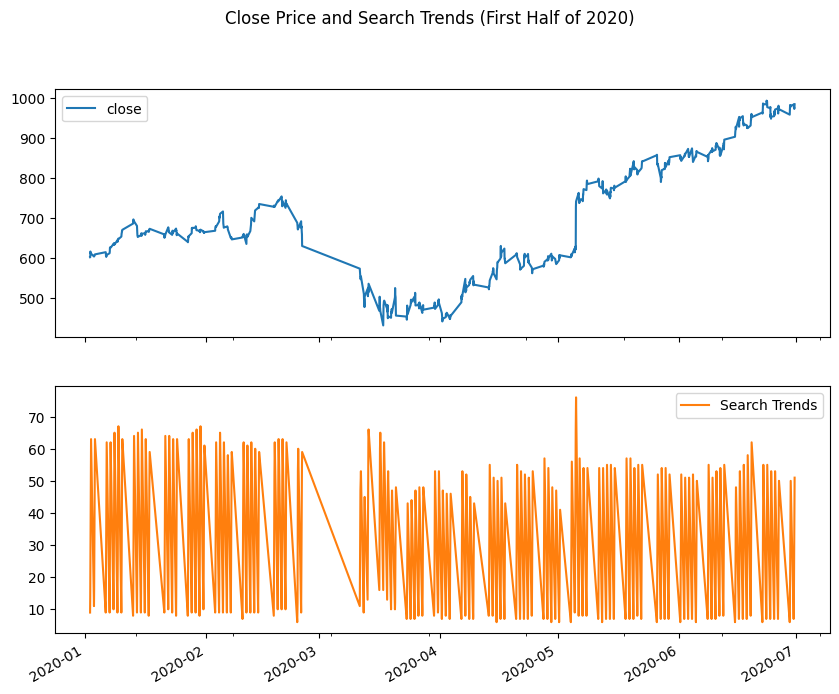

In [37]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`

# Plot the 'close' and 'Search Trends' columns on separate axes
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(10, 8), title="Close Price and Search Trends (First Half of 2020)")
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Early Spike in Trends: If there’s an initial drop in the stock price but a simultaneous or following rise in "Search Trends," it suggests heightened interest in the company, even during uncertain times.
Parallel Growth: If both time series exhibit steady growth from March onward (or following the initial 2020 shock), it aligns with a recovery in financial markets and rising consumer interest in online platforms.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [39]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# Create a new column 'Lagged Search Trends' by shifting 'Search Trends' by one hour in the combined DataFrame
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# View the first few rows to confirm the new column
df_combined.head()



,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


In [40]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
# Ensure we are using the correct DataFrame if `mercado_stock_trends_df` does not exist, e.g., `df_combined`
# Calculate the percent change (return) for the 'close' column
df_combined['Stock Return'] = df_combined['close'].pct_change()

# Calculate Stock Volatility as the 4-period rolling standard deviation of the stock returns
df_combined['Stock Volatility'] = df_combined['Stock Return'].rolling(window=4).std()

# View the first few rows to confirm the new column
df_combined.head()



,close,Search Trends,Lagged Search Trends,Stock Return,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134


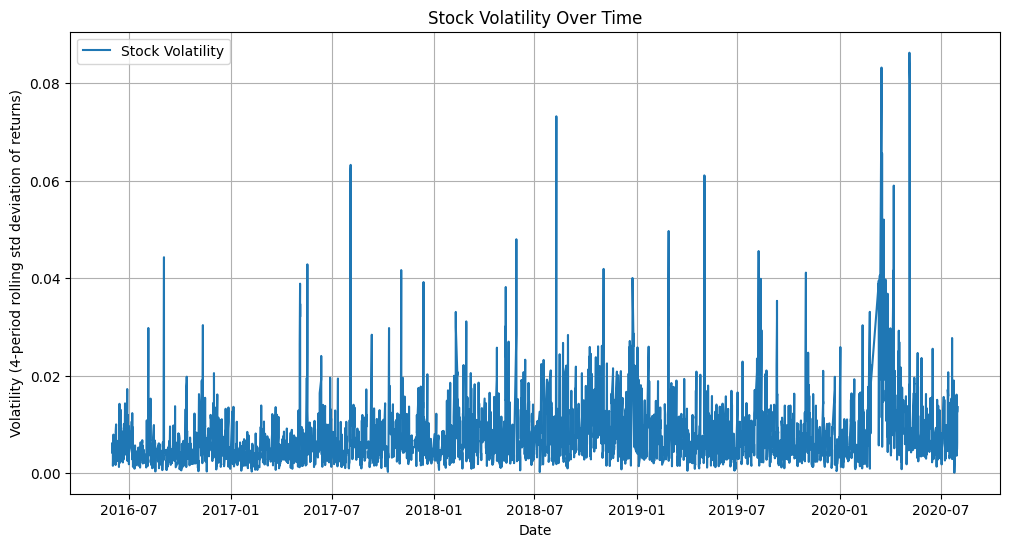

In [41]:
# Visualize the stock volatility
plt.figure(figsize=(12,6))
plt.plot(df_combined['Stock Volatility'], label='Stock Volatility')
plt.title("Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility (4-period rolling std deviation of returns)")
plt.legend()
plt.grid()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [42]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

# Calculate the hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100

# View the first few rows to confirm the new column
df_combined.head()


,close,Search Trends,Lagged Search Trends,Stock Return,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134,-0.234570


In [43]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
# Display the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,close,Search Trends,Lagged Search Trends,Stock Return,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134,-0.234570


,close,Search Trends,Lagged Search Trends,Stock Return,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.006380,0.012837,0.637986
2020-07-31 12:00:00,1087.925,32.0,20.0,-0.016147,0.013549,-1.614697
2020-07-31 13:00:00,1095.800,41.0,32.0,0.007239,0.013295,0.723855
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013552,0.013001,1.355174
2020-07-31 15:00:00,1122.510,53.0,47.0,0.010678,0.013566,1.067843


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [45]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Construct correlation table using df_combined
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
correlation_table


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**

If the correlation values for Lagged Search Trends with Stock Volatility or Hourly Stock Return are close to zero, then:

No predictable relationship exists between search trends and either stock volatility or stock returns.
However, if you observe significant positive or negative correlations, it would indicate a potential predictive relationship worth exploring further.

Without seeing the exact correlation values, this interpretation will help guide your conclusions based on the observed data. Let me know if you’d like further clarification!








## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [46]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends = df_mercado_trends.rename(columns={'Date': 'ds', 'Search Trends': 'y'})


# Drop an NaN values from the prophet_df DataFrame
df_mercado_prophet = df_mercado_trends.dropna()


# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_prophet.head())
display(df_mercado_prophet.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [47]:
# Call the Prophet function, store as an object
from prophet import Prophet

# Initialize Prophet and store it as an object
model = Prophet()


In [48]:
# Fit the time-series model.
# Fit the model to the data
model.fit(df_mercado_prophet)


02:15:47 - cmdstanpy - INFO - Chain [1] start processing
02:16:06 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')


# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()


/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [50]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)


# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.63525,81.029491,98.153115,44.63525,44.63525,45.029322,45.029322,45.029322,41.452573,...,1.860916,1.860916,1.860916,1.715833,1.715833,1.715833,0.0,0.0,0.0,89.664572
1,2016-06-01 01:00:00,44.63606,77.232220,94.850517,44.63606,44.63606,41.475142,41.475142,41.475142,37.943451,...,1.810814,1.810814,1.810814,1.720877,1.720877,1.720877,0.0,0.0,0.0,86.111202
2,2016-06-01 02:00:00,44.63687,67.407399,84.953331,44.63687,44.63687,31.151675,31.151675,31.151675,27.656565,...,1.769220,1.769220,1.769220,1.725890,1.725890,1.725890,0.0,0.0,0.0,75.788545
3,2016-06-01 03:00:00,44.63768,51.979455,68.512517,44.63768,44.63768,15.884456,15.884456,15.884456,12.417360,...,1.736225,1.736225,1.736225,1.730871,1.730871,1.730871,0.0,0.0,0.0,60.522136
4,2016-06-01 04:00:00,44.63849,35.469387,51.603696,44.63849,44.63849,-1.230447,-1.230447,-1.230447,-4.678054,...,1.711786,1.711786,1.711786,1.735821,1.735821,1.735821,0.0,0.0,0.0,43.408043


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


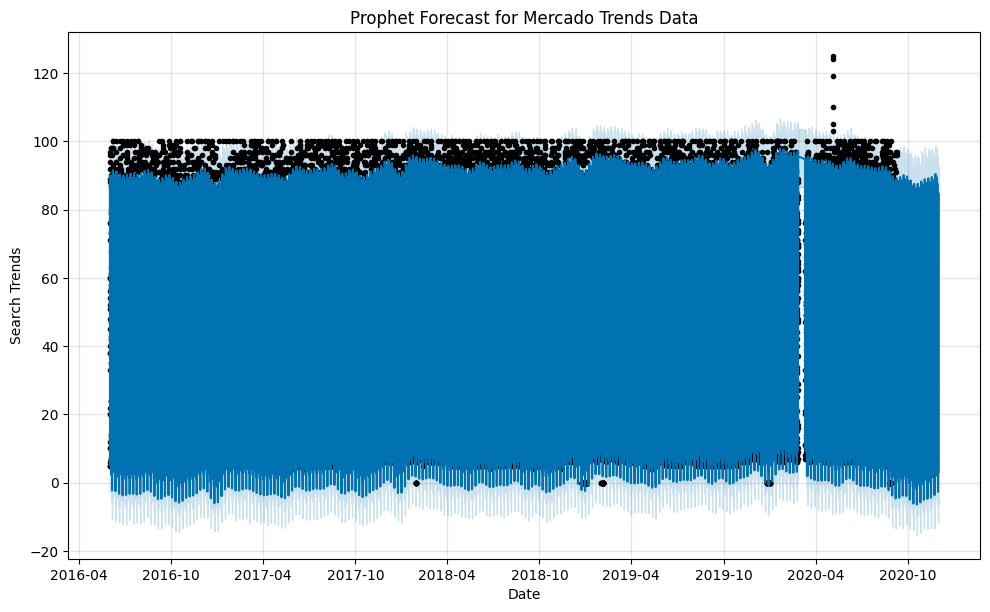

In [51]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)
plt.title("Prophet Forecast for Mercado Trends Data")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
If the Prophet forecast plot shows an upward trend in the near-term period, it suggests that search interest in MercadoLibre is likely to increase. This could reflect growing consumer attention and demand for MercadoLibre’s platform, potentially indicating positive momentum for the company.



#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [52]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()



,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.664572,81.029491,98.153115
2016-06-01 01:00:00,86.111202,77.232220,94.850517
2016-06-01 02:00:00,75.788545,67.407399,84.953331
2016-06-01 03:00:00,60.522136,51.979455,68.512517
2016-06-01 04:00:00,43.408043,35.469387,51.603696


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

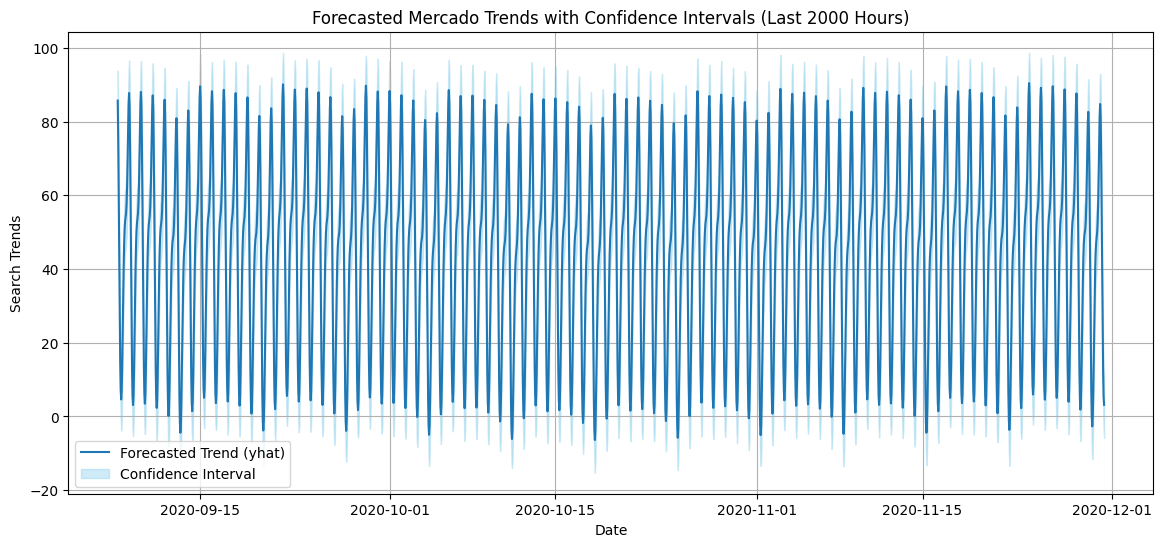

In [53]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

# Select the last 2000 hours of forecast data
last_2000_hours = forecast_mercado_trends.tail(2000)

# Plot the yhat, yhat_lower, and yhat_upper columns
plt.figure(figsize=(14,6))
plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='Forecasted Trend (yhat)')
plt.fill_between(
    last_2000_hours.index, 
    last_2000_hours['yhat_lower'], 
    last_2000_hours['yhat_upper'], 
    color='skyblue', 
    alpha=0.4,
    label='Confidence Interval'
)
plt.title("Forecasted Mercado Trends with Confidence Intervals (Last 2000 Hours)")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.legend()
plt.grid()
plt.show()


/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a fut

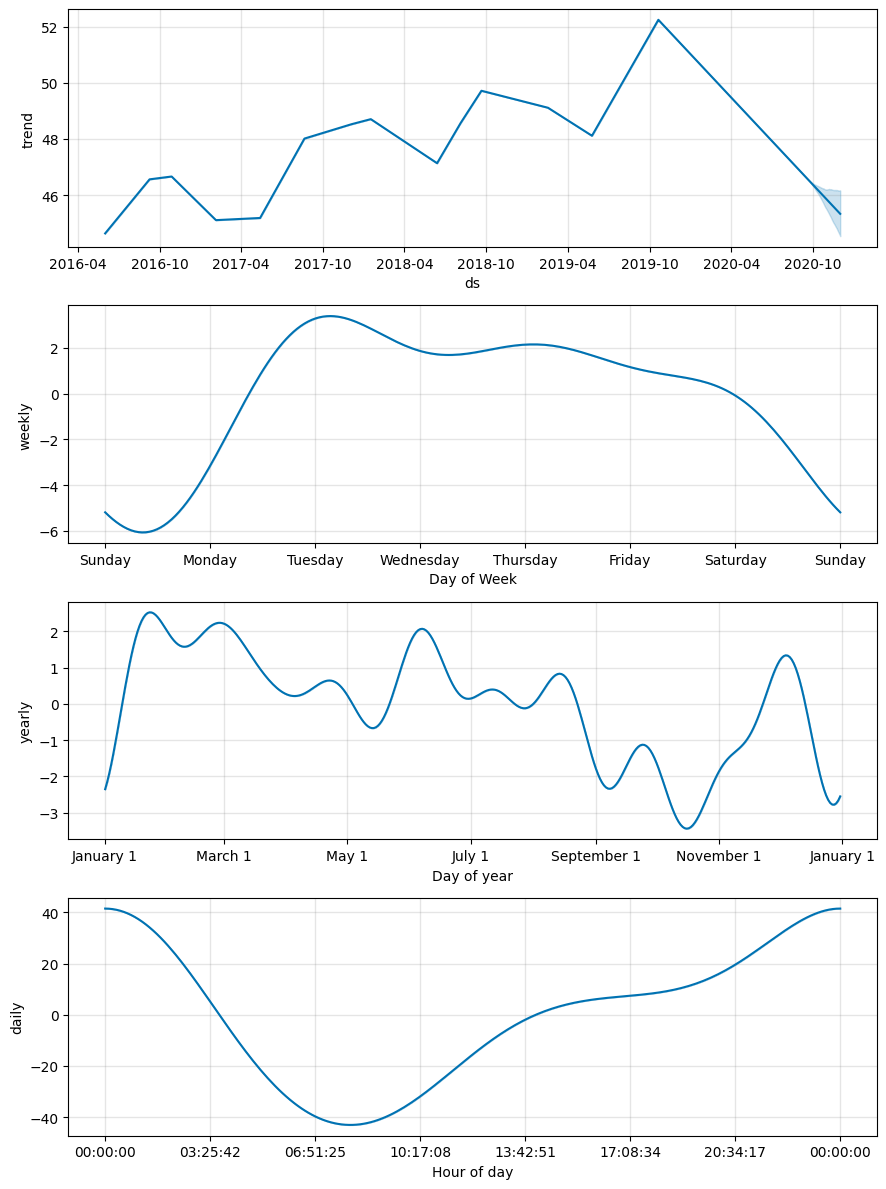

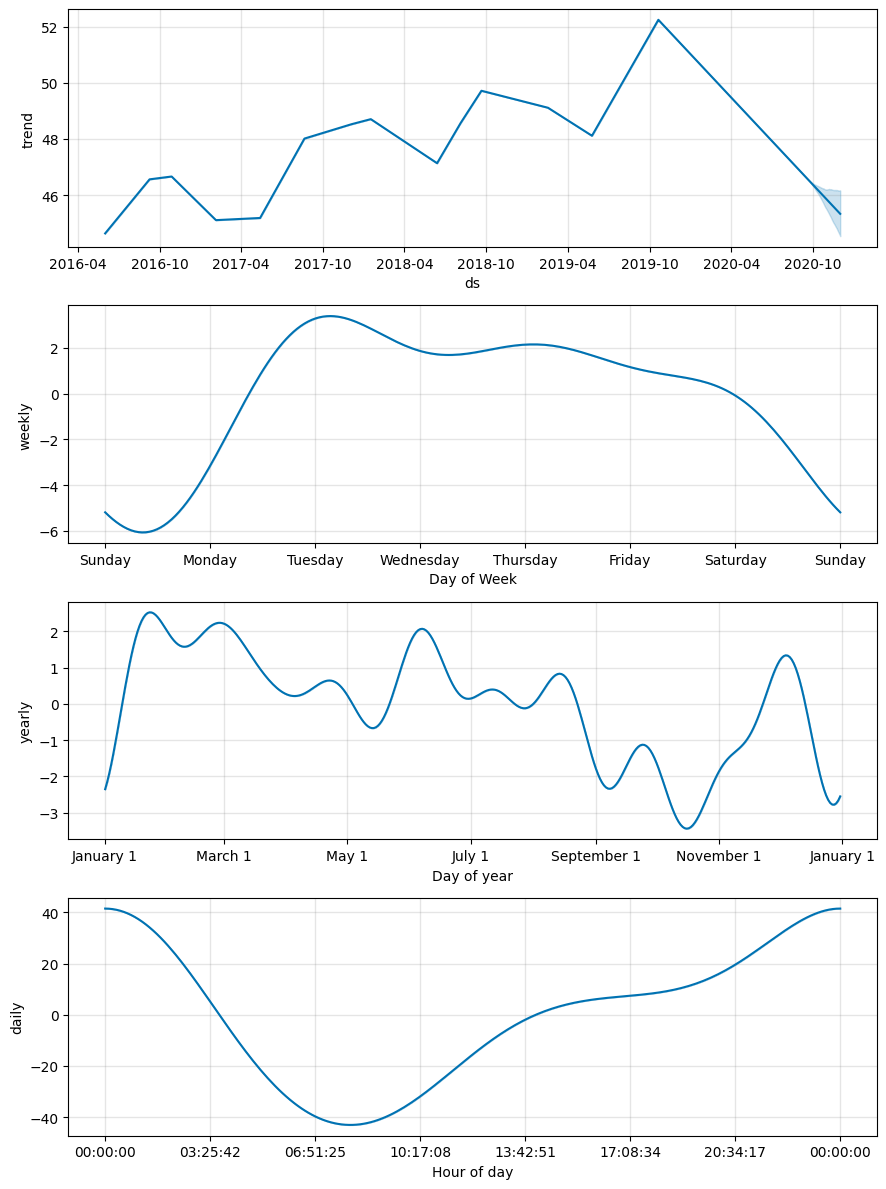

In [54]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model.plot_components(forecast_mercado_trends)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 8pm

**Question:** Which day of week gets the most search traffic?
   
**Answer:**Wednesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
January 15 has the lowest value